Première analyse de application_train.csv

In [37]:
import pandas as pd


# Charger les données
df = pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_train.csv")

# Afficher les premières lignes
print("Aperçu des données :")
print(df.head())

Aperçu des données :
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied      

In [38]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes :")
print(df.isnull().sum())


Valeurs manquantes :
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [39]:
# Infos générales
print("\nInformations sur les colonnes :")
print(df.info())


Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [13]:
# Vérifier la distribution de la variable cible (TARGET)
print("\nDistribution de la variable cible :")
print(df["TARGET"].value_counts(normalize=True))


Distribution de la variable cible :
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


On regarde les colonnes avec des valeurs manquantes

In [14]:
# Désactiver la troncature automatique des colonnes
pd.set_option('display.max_columns', None)

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # On garde les colonnes avec des NaN
missing_values = missing_values.sort_values(ascending=False)

print("Colonnes avec des valeurs manquantes :")
print(missing_values)



Colonnes avec des valeurs manquantes :
COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64


In [40]:
import pandas as pd

# Définir un seuil de valeurs manquantes (par exemple, une colonne avec plus de 30% de NaN sera supprimée)
seuil_na = 0.3  # 30% de valeurs manquantes

# Calculer le nombre total de NaN par colonne
missing_values = df.isnull().sum()

# Calculer le pourcentage de valeurs manquantes
missing_percentage = missing_values / len(df)

# Sélectionner les colonnes où le pourcentage de NaN est supérieur au seuil
columns_to_drop = missing_percentage[missing_percentage > seuil_na].index

# Supprimer ces colonnes
df_cleaned = df.drop(columns=columns_to_drop)

# Afficher les colonnes supprimées
print("Colonnes supprimées :")
print(columns_to_drop)


Colonnes supprimées :
Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAP

In [41]:
# Vérifier s'il reste des NaN dans le DataFrame nettoyé
missing_values_after = df_cleaned.isnull().sum()
print("Colonnes restantes avec des NaN :")
print(missing_values_after[missing_values_after > 0])  # Affiche les NaN restantes


Colonnes restantes avec des NaN :
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64


In [42]:
# Remplir les colonnes numériques avec la moyenne
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns  # Sélectionner les colonnes numériques
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(df_cleaned[numerical_columns].mean())

# Remplir les colonnes catégorielles avec la modalité la plus fréquente (mode)
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns  # Sélectionner les colonnes catégorielles
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Vérifier si toutes les valeurs manquantes sont traitées
missing_values_after = df_cleaned.isnull().sum()
print("Colonnes restantes avec des NaN après remplissage :")
print(missing_values_after[missing_values_after > 0])  # Affiche les NaN restantes


Colonnes restantes avec des NaN après remplissage :
Series([], dtype: int64)


In [43]:
import pandas as pd


# Charger les données
df = pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/bureau_balance.csv")

# Afficher les premières lignes
print("Aperçu des données :")
print(df.head())

Aperçu des données :
   SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C


In [44]:
import pandas as pd


# Charger les données
df = pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/bureau.csv")

# Afficher les premières lignes
print("Aperçu des données :")
print(df.head())

Aperçu des données :
   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1            

On nettoie Bureau

In [45]:
import pandas as pd

# 1️⃣ Charger les données
bureau = pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/bureau.csv")

# 2️⃣ Supprimer les colonnes avec plus de 30% de valeurs manquantes
missing_ratio = bureau.isna().mean()  # Ratio de valeurs manquantes par colonne
columns_to_drop = missing_ratio[missing_ratio > 0.3].index  # Colonnes à supprimer
bureau_cleaned = bureau.drop(columns=columns_to_drop)

# 3️⃣ Compléter les valeurs manquantes
# Séparer les colonnes numériques et catégoriques
num_cols = bureau_cleaned.select_dtypes(include=["number"]).columns
cat_cols = bureau_cleaned.select_dtypes(include=["object"]).columns

# Remplacer les NaN des colonnes numériques par la moyenne
bureau_cleaned[num_cols] = bureau_cleaned[num_cols].fillna(bureau_cleaned[num_cols].mean())

# Remplacer les NaN des colonnes catégoriques par la valeur la plus fréquente (mode)
for col in cat_cols:
    bureau_cleaned[col] = bureau_cleaned[col].fillna(bureau_cleaned[col].mode()[0])

# 4️⃣ Vérifier qu'il ne reste plus de valeurs manquantes
print("Valeurs manquantes restantes :")
print(bureau_cleaned.isna().sum().sum())  # Doit afficher 0 si tout est bien rempli


Valeurs manquantes restantes :
0


On encode les variables catégoriques

In [46]:
# Identifier les colonnes catégoriques
categorical_cols = bureau_cleaned.select_dtypes(include=['object']).columns
print("Colonnes catégoriques : ", categorical_cols.tolist())

# Compter le nombre de valeurs distinctes pour chaque colonne catégorique
category_counts = {col: bureau_cleaned[col].nunique() for col in categorical_cols}

# Afficher le nombre de valeurs distinctes par colonne
print("Nombre de valeurs distinctes par colonne : ")
for col, count in category_counts.items():
    print(f"{col}: {count}")


Colonnes catégoriques :  ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']
Nombre de valeurs distinctes par colonne : 
CREDIT_ACTIVE: 4
CREDIT_CURRENCY: 4
CREDIT_TYPE: 15


In [47]:
from sklearn.preprocessing import LabelEncoder

# Identifier les colonnes catégoriques
categorical_cols = bureau_cleaned.select_dtypes(include=['object']).columns
print("Colonnes catégoriques : ", categorical_cols.tolist())

# Vérifier le nombre de catégories par colonne
category_counts = {col: bureau_cleaned[col].nunique() for col in categorical_cols}
print("Nombre de catégories par colonne : ", category_counts)

# Appliquer One-Hot Encoding si <= 15 catégories, sinon Label Encoding
for col in categorical_cols:
    if category_counts[col] <= 15:
        # One-Hot Encoding
        bureau_cleaned = pd.get_dummies(bureau_cleaned, columns=[col], prefix=col)
    else:
        # Label Encoding
        le = LabelEncoder()
        bureau_cleaned[col] = le.fit_transform(bureau_cleaned[col])

# Vérification
print("Nouvelles colonnes après encodage : ", bureau_cleaned.columns.tolist())

Colonnes catégoriques :  ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']
Nombre de catégories par colonne :  {'CREDIT_ACTIVE': 4, 'CREDIT_CURRENCY': 4, 'CREDIT_TYPE': 15}
Nouvelles colonnes après encodage :  ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt', 'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold', 'CREDIT_CURRENCY_currency 1', 'CREDIT_CURRENCY_currency 2', 'CREDIT_CURRENCY_currency 3', 'CREDIT_CURRENCY_currency 4', 'CREDIT_TYPE_Another type of loan', 'CREDIT_TYPE_Car loan', 'CREDIT_TYPE_Cash loan (non-earmarked)', 'CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Credit card', 'CREDIT_TYPE_Interbank credit', 'CREDIT_TYPE_Loan for business development', 'CREDIT_TYPE_Loan for purchase of shares (margin lending)', 'CREDIT_TYPE_Loan for the purchase of equipment', 'CREDIT_TYPE_Loan for wo

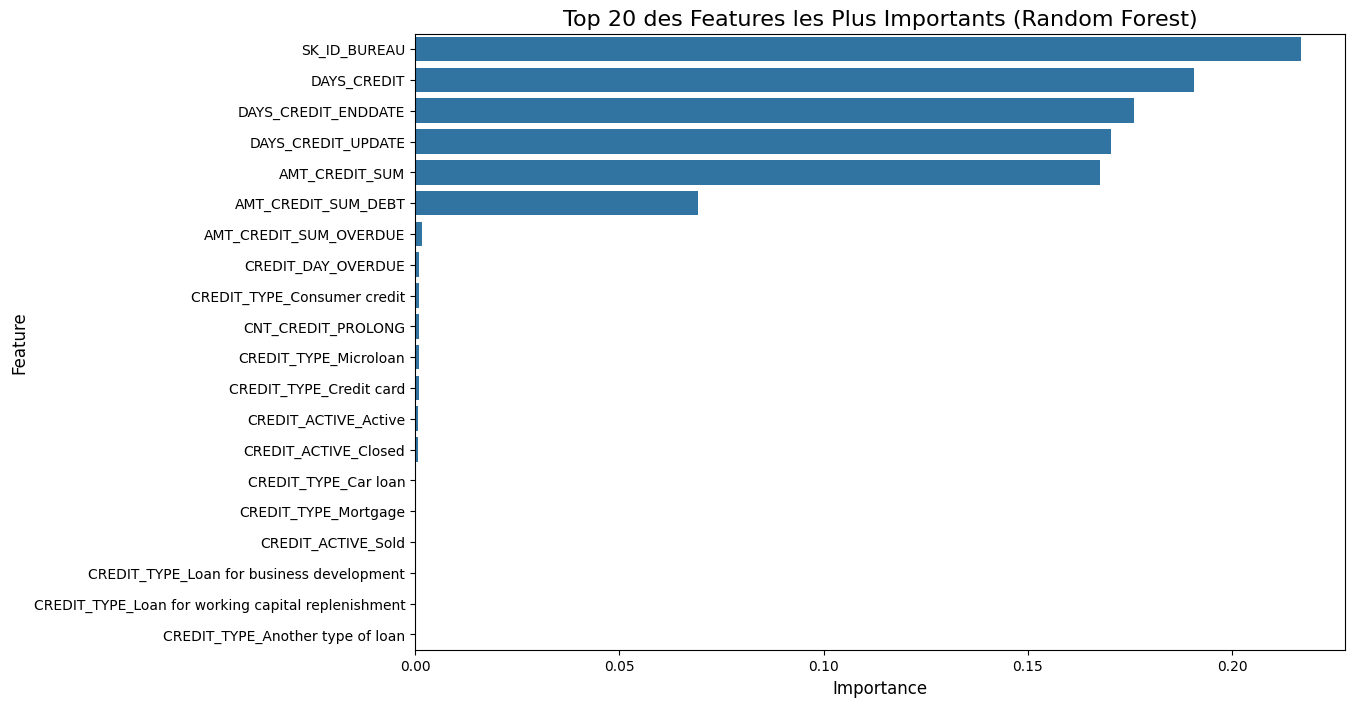

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Charger les données
application_train = pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_train.csv")

# Joindre bureau_cleaned avec le target à partir de application_train
df_rf = bureau_cleaned.merge(application_train[["SK_ID_CURR", "TARGET"]], on="SK_ID_CURR", how="left")
df_rf = df_rf.dropna(subset=["TARGET"])  # Supprimer les lignes où TARGET est manquant

# Séparer les features et la target
X = df_rf.drop(columns=["SK_ID_CURR", "TARGET"])
y = df_rf["TARGET"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer le Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Récupérer l'importance des features
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

# Affichage du graphique d'importance des features
plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_importance.head(20))  # Afficher les top 20 features
plt.title("Top 20 des Features les Plus Importants (Random Forest)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

In [30]:
# Garder uniquement les 6 meilleures features
top_6_features = feature_importance.head(6)["feature"].tolist()

# Filtrer le DataFrame avec ces features
df_top_6 = df_rf[["SK_ID_CURR"] + top_6_features]  # Garder aussi SK_ID_CURR pour référence

# Enregistrer en CSV
df_top_6.to_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/top_6_features.csv", index=False)

print("Fichier CSV 'top_6_features.csv' enregistré avec succès !")

Fichier CSV 'top_6_features.csv' enregistré avec succès !


In [3]:
bureau_balance = pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/bureau_balance.csv")
# Mapping des statuts pour pondérer les retards
status_mapping = {'0': 0, 'C': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

# Appliquer le mapping
bureau_balance["STATUS_SCORE"] = bureau_balance["STATUS"].map(status_mapping).fillna(0)

# Agréger par SK_ID_BUREAU
bureau_agg = bureau_balance.groupby("SK_ID_BUREAU").agg(
    total_months=("MONTHS_BALANCE", "count"),  # Nombre total de mois enregistrés
    unpaid_months=("STATUS_SCORE", lambda x: (x > 0).sum()),  # Nombre de mois avec impayés
    max_delay=("STATUS_SCORE", "max"),  # Plus grand retard enregistré
    avg_delay=("STATUS_SCORE", "mean")  # Retard moyen sur toute la durée
).reset_index()

# Calculer le ratio d'impayés
bureau_agg["unpaid_ratio"] = bureau_agg["unpaid_months"] / bureau_agg["total_months"]

# Supprimer les colonnes inutiles
bureau_agg.drop(columns=["unpaid_months", "total_months"], inplace=True)

# Fusion avec bureau.csv
bureau_merged = df_top_6.merge(bureau_agg, on="SK_ID_BUREAU", how="left")

# Enregistrer le fichier final
bureau_merged.to_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/merged_top_6_bureau_and_balance.csv", index=False)

print("Fichier fusionné enregistré sous 'merged_top_6_bureau_and_balance.csv'.")


NameError: name 'pd' is not defined

In [32]:
print(bureau_merged.isnull().sum())

SK_ID_CURR                  0
SK_ID_BUREAU                0
DAYS_CREDIT                 0
DAYS_CREDIT_ENDDATE         0
DAYS_CREDIT_UPDATE          0
AMT_CREDIT_SUM              0
AMT_CREDIT_SUM_DEBT         0
max_delay              941810
avg_delay              941810
unpaid_ratio           941810
dtype: int64


On remplit les colonnes manquantes par des 0 car on suppose que si ils ne sont pas suivi dans bureau balance, il n'y a logiquement pas eu de retard. 

In [2]:
# Remplacer NaN par 0 pour les colonnes de retard
bureau_merged["max_delay"].fillna(0, inplace=True)
bureau_merged["avg_delay"].fillna(0, inplace=True)
bureau_merged["unpaid_ratio"].fillna(0, inplace=True)

# Enregistrer le fichier final
bureau_merged.to_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/merged_top_6_bureau_and_balance.csv", index=False)

print("Correction appliquée : valeurs NaN remplacées par 0 et fichier enregistré ! ✅")
print(bureau_merged.isnull().sum())



NameError: name 'bureau_merged' is not defined

On regroupe tous les prêts par individu

In [5]:
bureau_merged =  pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/merged_top_6_bureau_and_balance.csv")
# Regroupement par individu (SK_ID_CURR)
bureau_merged = bureau_merged.groupby("SK_ID_CURR").agg({
    "max_delay": "max",          # Max retard
    "avg_delay": "mean",         # Moyenne retard
    "unpaid_ratio": "mean",      # Moyenne ratio impayés
    "DAYS_CREDIT": "min",        # Premier crédit enregistré
    "DAYS_CREDIT_ENDDATE": "max", # Dernière date de fin
    "DAYS_CREDIT_UPDATE": "max",  # Dernière mise à jour
    "AMT_CREDIT_SUM": "sum",      # Total crédits
    "AMT_CREDIT_SUM_DEBT": "sum", # Total dettes
}).reset_index()

# Sauvegarde du fichier final
bureau_merged.to_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/merged_top_6_bureau_and_balance.csv", index=False)

print("Regroupement terminé et fichier enregistré ! ✅")


Regroupement terminé et fichier enregistré ! ✅


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Charger les données
application_train = pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_train.csv")
application_test = pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_test.csv")  # Mettre le bon chemin

# Identifier les colonnes catégorielles et appliquer One-Hot Encoding
categorical_cols = application_train.select_dtypes(include=['object']).columns
application_train_encoded = pd.get_dummies(application_train, columns=categorical_cols, drop_first=True)
application_test_encoded = pd.get_dummies(application_test, columns=categorical_cols, drop_first=True)

# Aligner les colonnes entre train et test
train_columns = application_train_encoded.columns.tolist()
train_columns.remove("TARGET")  # On enlève la cible
application_test_encoded = application_test_encoded.reindex(columns=train_columns, fill_value=0)

# Séparer les caractéristiques (X) et la cible (y)
X = application_train_encoded.drop(columns=["TARGET"])
y = application_train_encoded["TARGET"]

# Créer et entraîner le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Récupérer l'importance des features
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Tracer un graphique des 20 features les plus importantes
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(20), palette="viridis")
plt.xlabel("Importance des features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top 20 des features les plus importantes selon Random Forest", fontsize=14)
plt.gca().invert_yaxis()  # Inverser l'ordre des features pour meilleure lisibilité
plt.show()

# Calculer l'importance cumulative
importance_df['Cumulative_Importance'] = importance_df['Importance'].cumsum()
threshold = 0.80  # Seuil de 80%
selected_features = importance_df[importance_df['Cumulative_Importance'] <= threshold]

# Afficher les features sélectionnées
print(f"Nombre de features sélectionnées : {len(selected_features)}")

# Sélectionner les features pour les jeux de données finaux
top_features = selected_features['Feature'].tolist()
application_train_selected = application_train_encoded[['SK_ID_CURR', 'TARGET'] + top_features]
application_test_selected = application_test_encoded[['SK_ID_CURR'] + top_features]

# Sauvegarde des fichiers
application_train_selected.to_csv("application_train_selected.csv", index=False)
application_test_selected.to_csv("application_test_selected.csv", index=False)

print("Les fichiers ont été sauvegardés :")
print("- 'application_train_selected.csv'")
print("- 'application_test_selected.csv'")


FileNotFoundError: [Errno 2] No such file or directory: 'application_test.csv'

Merge de Application Train (réduit) et Bureau (et bureau balance)

In [33]:

# Charger les fichiers
application_train_selected = pd.read_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_train_selected.csv"
)
merged_top_6_bureau_and_balance = pd.read_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/merged_top_6_bureau_and_balance.csv"
)

# Trouver l'intersection des SK_ID_CURR
common_ids = set(application_train_selected["SK_ID_CURR"]) & set(merged_top_6_bureau_and_balance["SK_ID_CURR"])

# Filtrer les deux DataFrames pour ne garder que les ID communs
application_train_selected_filtered = application_train_selected[application_train_selected["SK_ID_CURR"].isin(common_ids)]
merged_top_6_filtered = merged_top_6_bureau_and_balance[merged_top_6_bureau_and_balance["SK_ID_CURR"].isin(common_ids)]

# Fusionner uniquement sur les IDs communs
application_train_gauche = application_train_selected_filtered.merge(merged_top_6_filtered, on="SK_ID_CURR", how="inner")

# Enregistrer le fichier final
application_train_gauche.to_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_train_gauche.csv",
    index=False
)

print("Fusion terminée avec uniquement les SK_ID_CURR communs. ✅")



Fusion terminée avec uniquement les SK_ID_CURR communs. ✅


In [ ]:
Merge de Application Test et Bureau

In [34]:
import pandas as pd

# Charger les fichiers
application_test_selected = pd.read_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_test_selected.csv"
)
merged_top_6_bureau_and_balance = pd.read_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/merged_top_6_bureau_and_balance.csv"
)

# Trouver l'intersection des SK_ID_CURR
common_ids = set(application_test_selected["SK_ID_CURR"]) & set(merged_top_6_bureau_and_balance["SK_ID_CURR"])

# Filtrer les deux DataFrames pour ne garder que les ID communs
application_test_selected_filtered = application_test_selected[application_test_selected["SK_ID_CURR"].isin(common_ids)]
merged_top_6_filtered = merged_top_6_bureau_and_balance[merged_top_6_bureau_and_balance["SK_ID_CURR"].isin(common_ids)]

# Fusionner uniquement sur les IDs communs
application_test_gauche = application_test_selected_filtered.merge(merged_top_6_filtered, on="SK_ID_CURR", how="inner")

# Enregistrer le fichier final
application_test_gauche.to_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_test_gauche.csv",
    index=True
)

print("Fusion terminée avec uniquement les SK_ID_CURR communs. ✅")


Fusion terminée avec uniquement les SK_ID_CURR communs. ✅


In [35]:
import pandas as pd

# Charger les fichiers
final_application_droite = pd.read_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/final_application_data2.csv"
)
application_train_gauche = pd.read_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_train_gauche.csv"
)

# Trouver l'intersection des SK_ID_CURR
common_ids = set(final_application_droite["SK_ID_CURR"]) & set(application_train_gauche["SK_ID_CURR"])

# Filtrer les deux DataFrames pour ne garder que les ID communs
final_application_droite_filtered = final_application_droite[final_application_droite["SK_ID_CURR"].isin(common_ids)]
application_train_gauche_filtered = application_train_gauche[application_train_gauche["SK_ID_CURR"].isin(common_ids)]

# Fusionner uniquement sur les IDs communs
final_application_train = final_application_droite_filtered.merge(application_train_gauche_filtered, on="SK_ID_CURR", how="inner")

# Enregistrer le fichier final
final_application_train.to_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/final_application_train.csv",
    index=True
)

print("Fusion terminée avec uniquement les SK_ID_CURR communs. ✅")


Fusion terminée avec uniquement les SK_ID_CURR communs. ✅


In [36]:
import pandas as pd

# Charger les fichiers
final_application_droite = pd.read_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/final_application_data2.csv"
)
application_test_gauche = pd.read_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_test_gauche.csv"
)

# Trouver l'intersection des SK_ID_CURR
common_ids = set(final_application_droite["SK_ID_CURR"]) & set(application_test_gauche["SK_ID_CURR"])

# Filtrer les deux DataFrames pour ne garder que les ID communs
final_application_droite_filtered = final_application_droite[final_application_droite["SK_ID_CURR"].isin(common_ids)]
application_test_gauche_filtered = application_test_gauche[application_test_gauche["SK_ID_CURR"].isin(common_ids)]

# Fusionner uniquement sur les IDs communs
final_application_test = final_application_droite_filtered.merge(application_test_gauche_filtered, on="SK_ID_CURR", how="inner")

# Enregistrer le fichier final
final_application_test.to_csv(
    "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/final_application_test.csv",
    index=True
)

print("Fusion terminée avec uniquement les SK_ID_CURR communs. ✅")


Fusion terminée avec uniquement les SK_ID_CURR communs. ✅


In [24]:
import pandas as pd

# Charger les fichiers
file1 = "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/final_application_data2.csv"
file2 = "/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_train.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Convertir SK_ID_CURR en set
ids1 = set(df1["SK_ID_CURR"])
ids2 = set(df2["SK_ID_CURR"])

# Vérifier les IDs manquants
missing_in_file2 = ids1 - ids2
missing_in_file1 = ids2 - ids1

# Afficher les résultats
print(f"Nombre d'ID présents dans final_application_data2.csv mais absents de application_train.csv : {len(missing_in_file2)}")
if missing_in_file2:
    print("Exemples d'ID manquants dans application_train.csv :", list(missing_in_file2)[:10])

print(f"Nombre d'ID présents dans application_train.csv mais absents de final_application_data2.csv : {len(missing_in_file1)}")
if missing_in_file1:
    print("Exemples d'ID manquants dans final_application_data2.csv :", list(missing_in_file1)[:10])


Nombre d'ID présents dans final_application_data2.csv mais absents de application_train.csv : 47800
Exemples d'ID manquants dans application_train.csv : [131072, 393216, 393218, 262152, 393224, 393227, 131084, 262159, 131088, 131089]
Nombre d'ID présents dans application_train.csv mais absents de final_application_data2.csv : 16454
Exemples d'ID manquants dans final_application_data2.csv : [163842, 163846, 229383, 262151, 196617, 360455, 425990, 294929, 163858, 229394]


In [49]:
# Charger les données
bureau_balance = pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/bureau_balance.csv")
bureau = pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/bureau.csv")
application_train = pd.read_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/application_train.csv")

# Nettoyage et traitement de bureau
bureau = bureau.drop(columns=bureau.columns[bureau.isna().mean() > 0.3])
num_cols = bureau.select_dtypes(include=["number"]).columns
cat_cols = bureau.select_dtypes(include=["object"]).columns

bureau[num_cols] = bureau[num_cols].fillna(bureau[num_cols].mean())
for col in cat_cols:
    bureau[col] = bureau[col].fillna(bureau[col].mode()[0])

# Encodage des variables catégoriques
for col in cat_cols:
    if bureau[col].nunique() <= 15:
        bureau = pd.get_dummies(bureau, columns=[col], prefix=col)
    else:
        bureau[col] = LabelEncoder().fit_transform(bureau[col])

# Merge avec application_train
df_rf = bureau.merge(application_train[["SK_ID_CURR", "TARGET"]], on="SK_ID_CURR", how="left").dropna(subset=["TARGET"])

# Préparation des données
X = df_rf.drop(columns=["SK_ID_CURR", "TARGET"])
y = df_rf["TARGET"]
    

# Modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Importance des features
feature_importance = pd.DataFrame({
        "feature": X.columns,
        "importance": rf.feature_importances_
    }).sort_values(by="importance", ascending=False)

# Sélection des 6 features les plus importantes
important_features = feature_importance["feature"].tolist()[:6]
bureau = bureau[["SK_ID_CURR"] + important_features]

# Ajout de la variable STATUS_SCORE dans bureau_balance
status_mapping = {'0': 0, 'C': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
bureau_balance["STATUS_SCORE"] = bureau_balance["STATUS"].map(status_mapping).fillna(0)

# Agrégation par SK_ID_BUREAU
bureau_agg = bureau_balance.groupby("SK_ID_BUREAU").agg(
        max_delay=("STATUS_SCORE", "max"),
        avg_delay=("STATUS_SCORE", "mean"),
        unpaid_ratio=("STATUS_SCORE", lambda x: (x > 0).sum() / len(x))
    ).reset_index()

# Fusion avec bureau
bureau = bureau.merge(bureau_agg, on="SK_ID_BUREAU", how="left").fillna(0)

# Agrégation par SK_ID_CURR
bureau = bureau.groupby("SK_ID_CURR").agg(
        max_delay=("max_delay", "max"),
        avg_delay=("avg_delay", "mean"),
        unpaid_ratio=("unpaid_ratio", "mean"),
        DAYS_CREDIT=("DAYS_CREDIT", "min"),
        DAYS_CREDIT_ENDDATE=("DAYS_CREDIT_ENDDATE", "max"),
        DAYS_CREDIT_UPDATE=("DAYS_CREDIT_UPDATE", "max"),
        AMT_CREDIT_SUM=("AMT_CREDIT_SUM", "sum"),
        AMT_CREDIT_SUM_DEBT=("AMT_CREDIT_SUM_DEBT", "sum")
    ).reset_index()

# Sauvegarde des données traitées
bureau.to_csv("/Users/konstantinganz/Library/CloudStorage/OneDrive-Personnel/Documents/Konstantin/CS/S8 Hong Kong/Cours/Stat ML/Projet_1/kaggle_statml_housing_credit/data/home-credit-default-risk/bureau_bureau_balance-selected.csv", index=False)

print("Les fichiers ont été sauvegardés :")
print("- 'bureau_bureau_balance.csv'")

Les fichiers ont été sauvegardés :
- 'bureau_bureau_balance.csv'
